In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
# 25% H7D 37 degrees
spectra_paths = "D:\\211206 mass spec\\processed\\211206 CTB H7D GV 37d 25pc_3386_BE2_01_81035.d.mzML", "D:\\211206 mass spec\\processed\\211206 ctb gv h7d 25pc 37d p2_3_BE6_01_81039.d.mzML"
map_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\reaction maps\\CTB h7d time course 25pc.xlsx"

Error: No HDF5 file present. Please create an HDF5 file first

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\211206 mass spec\processed\211206 CTB H7D GV 37d 25pc_3386_BE2_01_81035.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\211206 mass spec\processed\211206 CTB H7D GV 37d 25pc_3386_BE2_01_81035.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
1359 2
Noise Level: 0.055395791039069234 Window: 0.2
0.70665 0.337434
1.15973 0.20783000000000018
2.09485 0.16208
3.06332 0.21613000000000016
3.98193 0.19953999999999983
4.89635 0.1704099999999995
Bad Peak [6.2383     0.13308723] 0.03324999999999978 [6.20505, 6.2383]
Getting scans: [123, 173]
Length merge axis: 38302
Getting scans: [348, 387]
Length merge axis: 38211
Getting scans: [580, 632]
Length merge axis: 38682
Getting scans: [800, 848]
Length merge axis: 38863
Getting scans: [1023, 1064]
Length merge axis: 38486


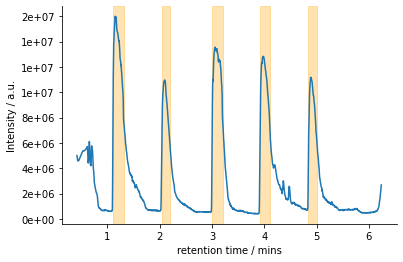

4
5

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\211206 mass spec\processed\211206 ctb gv h7d 25pc 37d p2_3_BE6_01_81039.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\211206 mass spec\processed\211206 ctb gv h7d 25pc 37d p2_3_BE6_01_81039.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
1308 2
Noise Level: 0.061374482048395115 Window: 0.2
0.706867 0.13343300000000002
1.26793 0.19945999999999997
2.21137 0.24106999999999967
3.14663 0.18700000000000028
4.04433 0.14132000000000033
5.04162 0.1829300000000007
Getting scans: [150, 198]
Length merge axis: 38333
Getting scans: [374, 432]
Length merge axis: 38337
Getting scans: [599, 644]
Length merge axis: 38102
Getting scans: [821, 855]
Length merge axis: 37862
Getting scans: [1056, 1100]
Length merge axis: 37790


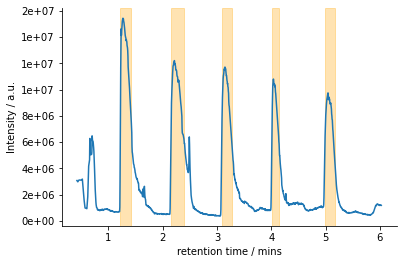

4
10
10


False

In [4]:
eng.load_multi_mzml(spectra_paths, plot = True, clear_hdf5 = True)

In [5]:
# TIC/time point invalidation 
# add option to delete index in TIC data 
# add option to invalidate specific time/species 
# add option to plot bar chart instead of scatter/line - especially useful for comparison of diff species

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
eng.update_config(masslb = 10000, massub = 20000, minmz = 500, peakthresh = 0.02)

# eng.update_config(masslb = 10000, massub = 20000, peakthresh = 0.01, datanorm = 0, 
#                  beta = 0, peaknorm = 0, exnorm = 0, numit=100, numz=50,
#                  endz=100, startz=10,zzsig=1.0, psig=1.0,mzsig=1.0,psfun=0,msig=0.0,molig=0.0,
#                  massbins=1.0,mtabsig=0.0, subbuff=0.0, subtype=2, mzbins=0.0, 
#                  peakwindow=10.0, smooth = 0)


eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.1383732999999978
Execution Time: 19.14681490000001
Execution Time: 0.5457850000000093
Peak info saved to: UniDec_Figures_and_Files\.hdf5_extracts.txt


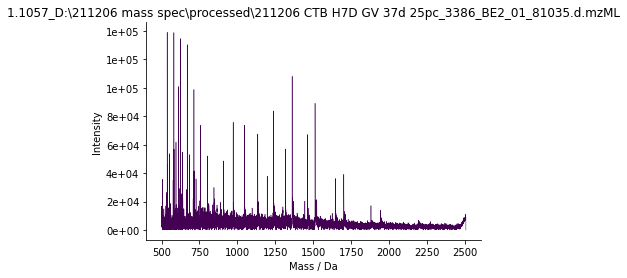

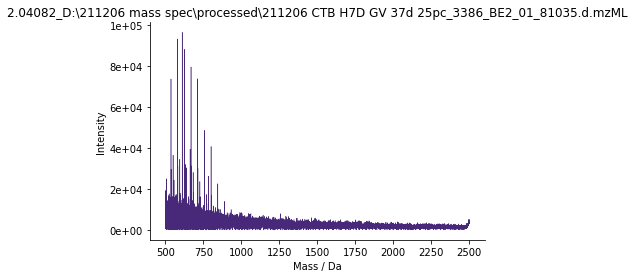

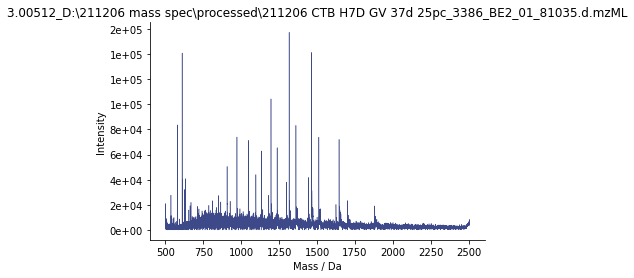

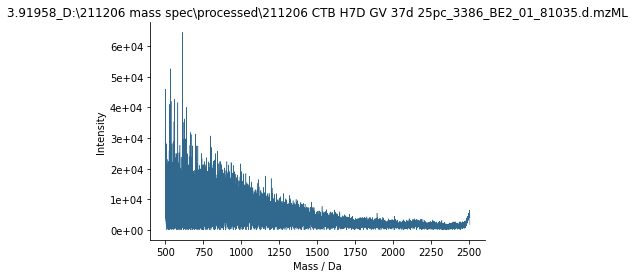

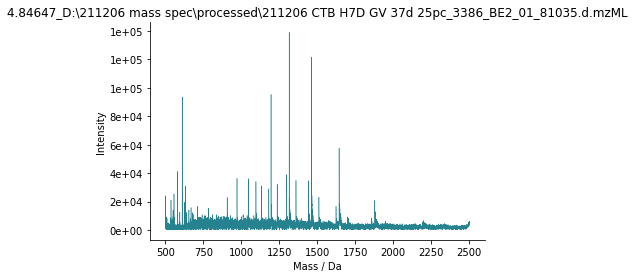

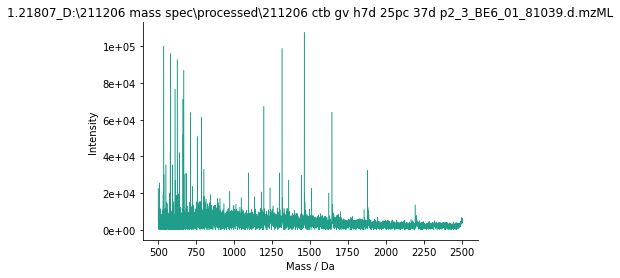

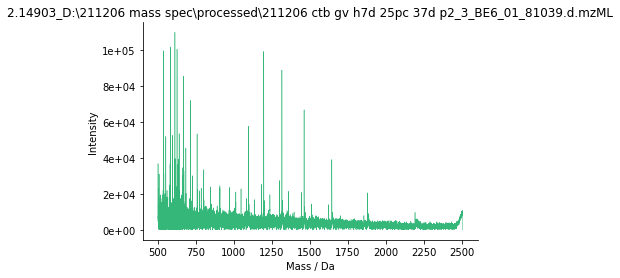

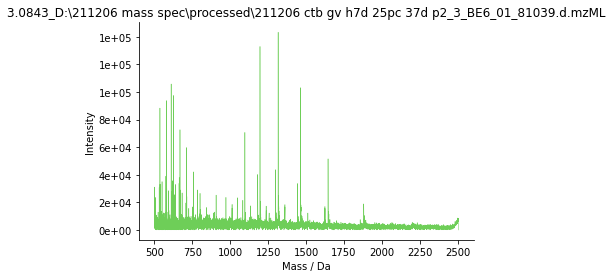

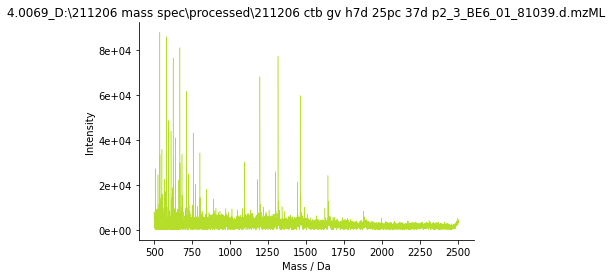

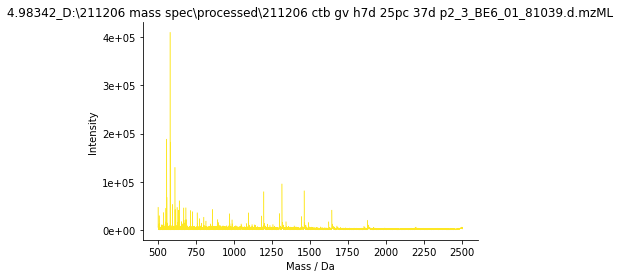

In [7]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

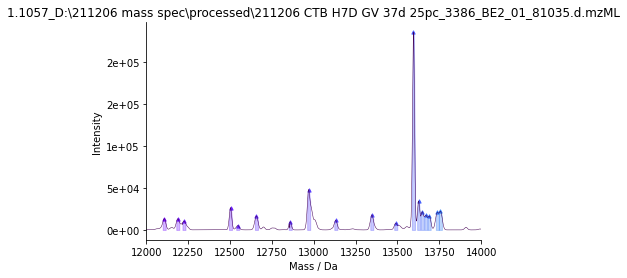

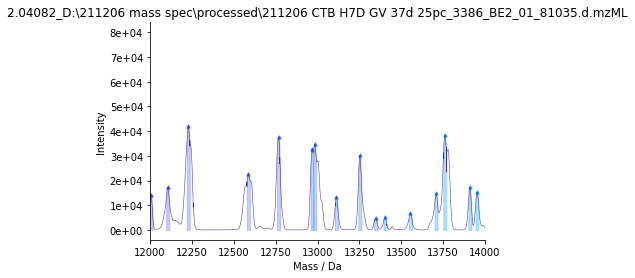

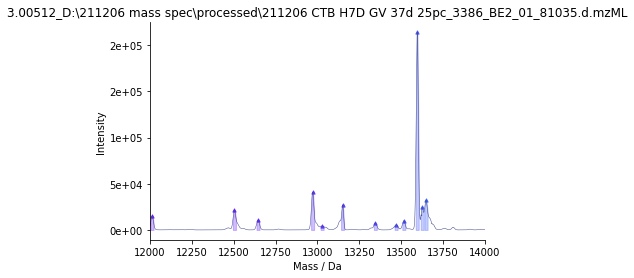

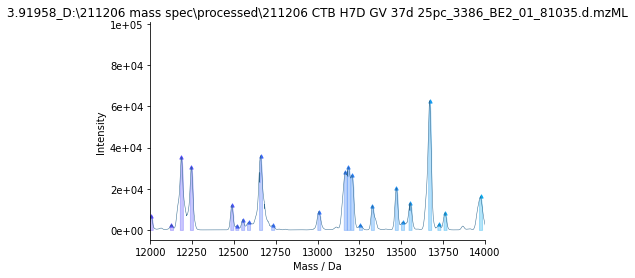

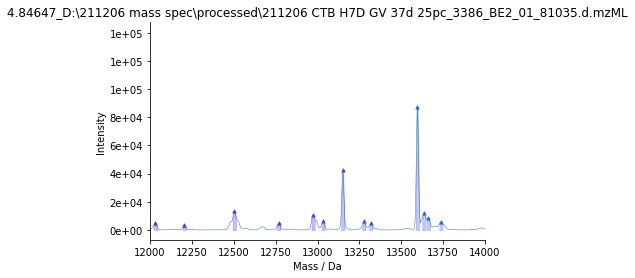

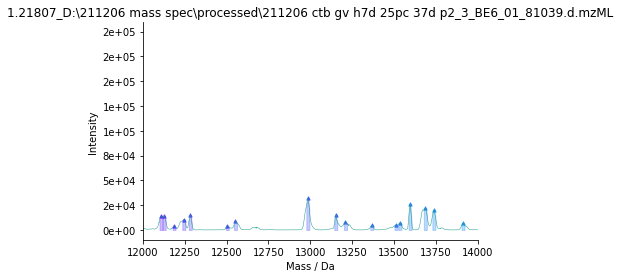

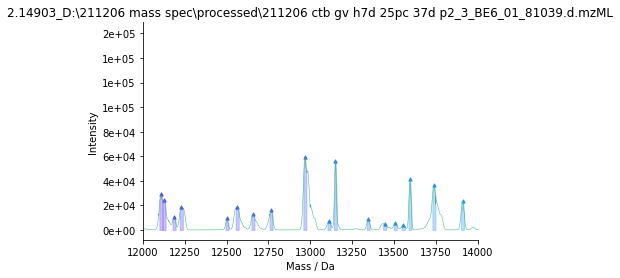

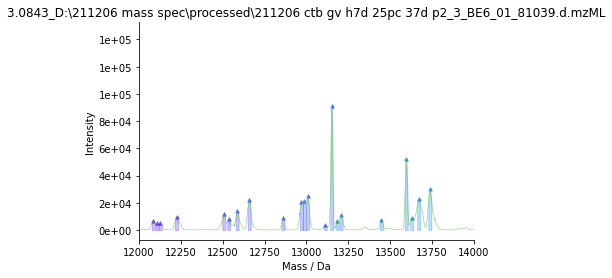

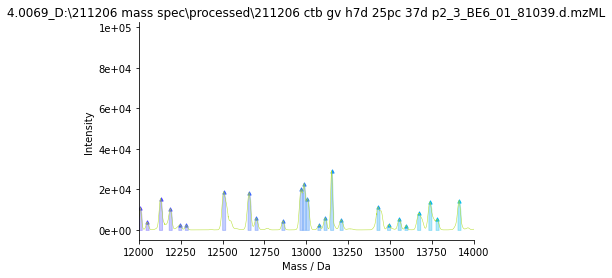

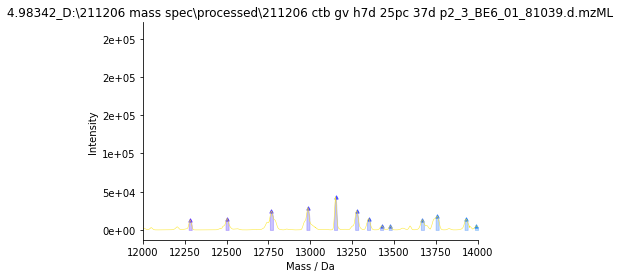

In [8]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [12000, 14000])

In [9]:
eng.upload_map(map_path)

(     Reaction     Species  Concentration Units      Mass Reagent_Type Sequence
 0  CTB H7D 25      CTB-H6          100.0    uM  13597.42      Protein      NaN
 1  CTB H7D 25  CTB-GVSEYG            NaN    uM  13151.97      Protein      NaN
 2  CTB H7D 25      CTB-OH            NaN    uM  12559.36      Protein      NaN,
             Type    Reaction Time  Injection  Species  Valid
 Well ID                                                     
 1        Protein  CTB H7D 25   15          1      NaN   True
 2        Protein  CTB H7D 25   30          1      NaN   True
 3        Protein  CTB H7D 25   45          1      NaN   True
 4        Protein  CTB H7D 25   60          1      NaN   True
 5        Protein  CTB H7D 25   75          1      NaN   True
 6        Protein  CTB H7D 25   90          2      NaN   True
 7        Protein  CTB H7D 25  105          2      NaN   True
 8        Protein  CTB H7D 25  120          2      NaN   True
 9        Protein  CTB H7D 25  150          2      NaN   Tr

In [10]:
eng.pmap

,Type,Reaction,Time,Injection,Species,Valid
Well ID,,,,,,
1,Protein,CTB H7D 25,15,1,NaN,True
2,Protein,CTB H7D 25,30,1,NaN,True
3,Protein,CTB H7D 25,45,1,NaN,True
4,Protein,CTB H7D 25,60,1,NaN,True
5,Protein,CTB H7D 25,75,1,NaN,True
6,Protein,CTB H7D 25,90,2,NaN,True
7,Protein,CTB H7D 25,105,2,NaN,True
8,Protein,CTB H7D 25,120,2,NaN,True
9,Protein,CTB H7D 25,150,2,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,CTB H7D 25,CTB-H6,100.0,uM,13597.42,Protein,NaN
1,CTB H7D 25,CTB-GVSEYG,NaN,uM,13151.97,Protein,NaN
2,CTB H7D 25,CTB-OH,NaN,uM,12559.36,Protein,NaN


In [12]:
eng.process_maps()

In [13]:
eng.peak_match(silent = True)

In [14]:
eng.normalise_peaks(silent = True)

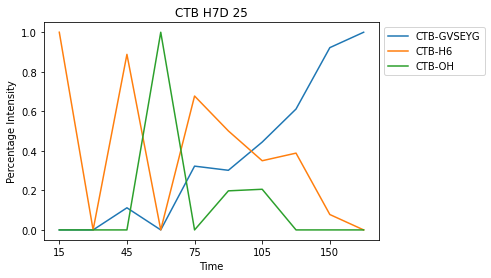

In [15]:
eng.plot_data()

Time:60 successfully invalidated
Time:60 successfully invalidated


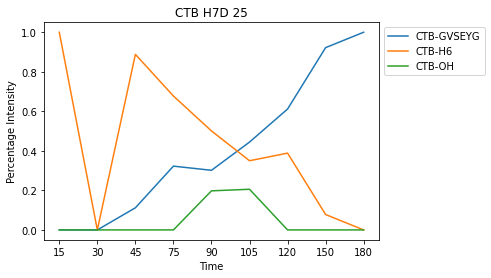

In [16]:
eng.invalidate(60, 'Time')
eng.plot_data()

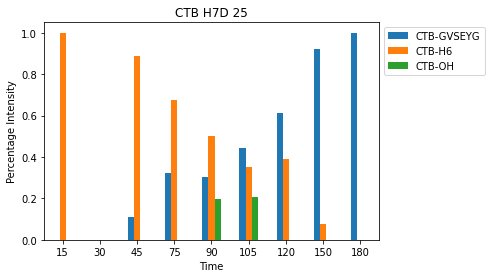

In [17]:
eng.plot_data(plot_type='bar')

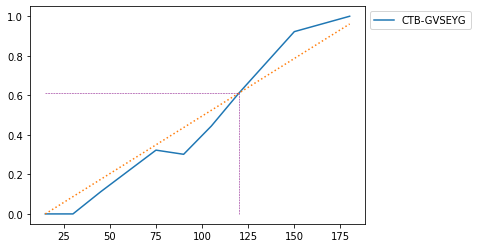

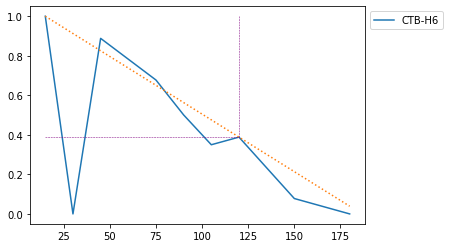

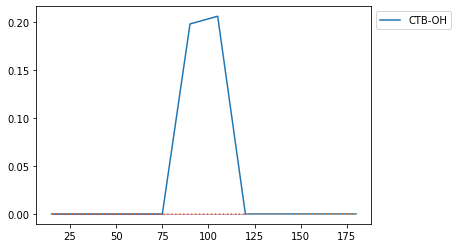

In [18]:
eng.initial_rate(thresh=0.8)

In [19]:
eng.ratedict

{'CTB H7D 25': CTB-GVSEYG    0.005824
 CTB-H6       -0.005824
 CTB-OH       -0.000000
 dtype: float64}